# **IEOR 4404  Simulation (Fall 2020)**

**Homework 2  [Total points: 80 Points]**


**Due 11:59 PM, Oct 18**

Homework 2 consists of application-oriented exercises mostly focusing on different sampling techniques for sampling from a discrete distribution.

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [1]:
#Your Name: Yi-Ping Tseng
#Your UNI: yt2690

In [2]:
!pip install sympy -U

Requirement already up-to-date: sympy in /usr/local/lib/python3.6/dist-packages (1.6.2)


In [3]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np

import scipy.special as spsp

import matplotlib.pyplot as plt

%matplotlib inline

import sympy

import scipy.stats as spst

# Exercise 1 [70 points]

In HW1, we studied Negative Binomial distribution, which is a discrete probability distribution that models the number of successes (Our outcome variable: $k$) in a sequence of independent and identically distributed Bernoulli trials (with the probability of success=$p$) before a specified (non-random) number of failures (denoted $r$) occurs (Source: Wikipedia [Negative Binomial Distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution)). 

The probability mass function follows

$P(k)=\frac{(k+r-1)!}{k!(r-1)!}p^k(1-p)^r$ where $k=0, 1, 2, ..., \infty$

* In Q1-Q4, we want to will use this distribution as our proposal distribution to perform rejection sampling to get samples from a Poisson distribution.
* In Q5 and Q6, we will be studying the composition method based on this distribution.


## Q1. [15 points]

Let's first propose a different way to sample from a Negative Binomial distribution. Based on the definition of Negative Binomial distribution, this distribution is nothing but the sum of $r$ variables that all follow a Geometric distribution. For this Geometric distribution, it is defined as the number of successes needed **before** getting the first failure, when the probability of success in each Bernoulli trial is $p$. [notice that it is defined slightly different from the Geometric distributions we have seen so far]

Since a Geometric distribution can be generated using the direct conversion method, we can use the following steps as an alternative method to generate $N$ samples from a Negative Binomial distribution.

* Derive the direct conversion rule for the Geometric distribution.
* Generate $r$ arrays of random samples from a Geometric distribution. Each array should contain $N$ random samples.
* Summing up these $r$ arrays to get an array of $N$ elements. Each element is a random sample from the Negative Binomial distribution.

For this question
* Use `sympy.Sum()` to derive the CDF of the geometric distribution from the PMF. 
* Use `sympy.solve()` to help you derive the direct conversion formula based on the CDF.
* Based on the formula and follow the steps listed above, generate 10000 random  samples from a Negative Binomial distribution with $r=3$ and $p=0.9$.
* Plot both the sample distribution of these 10000 samples (using scatter plot) and the corresponding theoretical distribution (using bar chart) in the same graph.



In [4]:
sympy.init_printing()
x = sympy.Symbol("x", nonnegative=True)
p = sympy.Symbol("p", nonnegative=True)
u = sympy.Symbol("u")
pmf = p**x * (1-p)
cdf = sympy.Sum(pmf, (x, 0, x)).doit().simplify()
cdf

In [5]:
sympy.solve(cdf - u, x)[0].simplify()

In [6]:
sympy.solve(cdf.subs({x: x - 1}) - u, x)[0].simplify()

In [7]:
r = 3
p = 0.9
N = 10000
neg_bin = np.zeros(shape=(r, N))
for row in range(r):
  u = np.random.rand(N)
  neg_bin[row] = np.array(np.floor(np.log(1-u) / np.log(p)))

neg_bin = neg_bin.sum(axis=0)

Text(0.5, 1.0, 'Theoratical Points versus Samples')

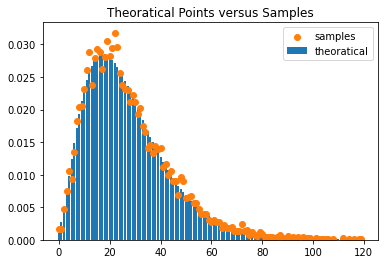

In [8]:
neg_bin_k, neg_bin_counts = np.unique(neg_bin, return_counts=True)

x = np.arange(0, np.max(neg_bin_k) + 1)
pmf_nb = spsp.comb(x+r-1, x) * p**(x) * (1-p)**(r)

plt.bar(x, pmf_nb, label='theoratical')
plt.scatter(
    neg_bin_k, neg_bin_counts/sum(neg_bin_counts), 
    label='samples', zorder=2
)
plt.legend()
plt.title('Theoratical Points versus Samples')

##Q2. [15 points]

Let's use a Negative Binomial Distribution as a proposal distribution to generate samples from a Poisson distribution with $\lambda=40$. 

Since we want two distributions to follow similar shapes, let's select a negative binomial distribution with the mean values equals to 40 as well. Remember, the expected value of a negative binomial distribution is equal to $\frac{rp}{1-p}$.

* Let's assume we want to use $r=2$ for the proposal distribution.  With the help of `sympy.solve()` function, solve $p$ so that two distributions have the same mean. We will use the $r$ and $p$ value for all subparts in Q2. 
* Visualize the target distribution for $x$ between 0 and 100 using a bar chart. In the same graph, visualize the proposal distribution for the same $x$ range using a scatter plot. Make sure to add a legend to label each plot. 
* Visualize the ratio between $PMF_{target}(x)$ and $PMF_{proposal}(x)$ for $x$ between $0$ and $100$ using a bar chart.
* Find out the $c$ value for rejection sampling.
* Construct a function (or functions) that helps to generate **one** sample from the target distribution using rejection sampling. [your algorithm should allow you to generate sample values above 100 as well]
* Generate 10000 random samples from the target distribution.
* Plot both the sample distribution of these 10000 samples (using scatter plot) and the corresponding theoretical distribution (using bar chart) in the same graph.



In [9]:
#derive p
r_s = sympy.Symbol("r")
p_s = sympy.Symbol("p", nonnegative=True)
lm_s = sympy.Symbol("λ")

sympy.solve((((r_s*p_s) / (1-p_s)) - lm_s).subs({r_s: 2, lm_s: 40}))

In [10]:
#plot the target and proposal distribution
x = np.arange(100)
lam = 40
r = 2
p = 20/21
pmf_poi = [lam**(i) * np.exp(-1*lam) / spsp.factorial(i) for i in range(100)]
pmf_ng_bin = spsp.comb(x+r-1, x) * (1-p)**(r) * p**(x)

Text(0.5, 1.0, 'Poisson versus Negative Binomial Distribuiton')

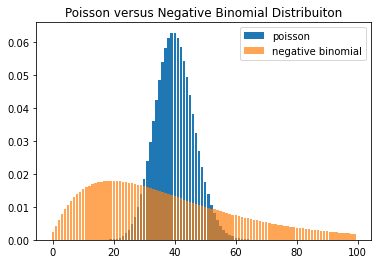

In [11]:
plt.bar(x, pmf_poi, label='poisson')
plt.bar(x, pmf_ng_bin, label='negative binomial', zorder=2, alpha=0.7)
plt.legend()
plt.title('Poisson versus Negative Binomial Distribuiton')

Text(0.5, 1.0, 'Ratio of Poisson / Negative Binomial')

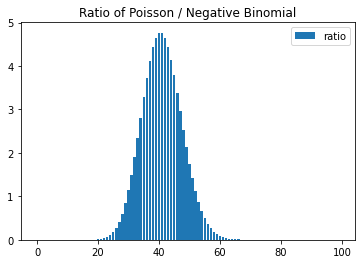

In [12]:
#plot the ratio between two distributions
plt.bar(x, pmf_poi/pmf_ng_bin, label='ratio')
plt.legend()
plt.title('Ratio of Poisson / Negative Binomial')

In [13]:
#find out the c value 
c = np.max(pmf_poi/pmf_ng_bin)
c

In [14]:
#sampling and visualization
def sampling_NB(ub):
  return np.random.randint(ub)

def getPoiPMF(lam, i):
  return spst.poisson.pmf(i, lam)
def getNBPMF(n, p, i):
  return spsp.comb(i+n-1, i) * (1-p)**(n) * p**(i)

def rejection_sampling(lam, n, p, ub, c):
  proposal = sampling_NB(ub)
  u = np.random.rand()
  while u > getPoiPMF(lam, proposal) / getNBPMF(n, p, proposal) / c:
    proposal = sampling_NB(ub)
    u = np.random.rand()
  
  return proposal

In [15]:
N = 10000
upper_bound = 200

print('poisson parameter - lambda: ', lam)
print('negative binomial parameters - (n, p): ', (r, p))
samples = [rejection_sampling(lam, r, p, upper_bound, c) for _ in range(N)]
unique, counts = np.unique(samples, return_counts=True)

poisson parameter - lambda:  40
negative binomial parameters - (n, p):  (2, 0.9523809523809523)


Text(0.5, 1.0, 'Theoratical Points versus Samples')

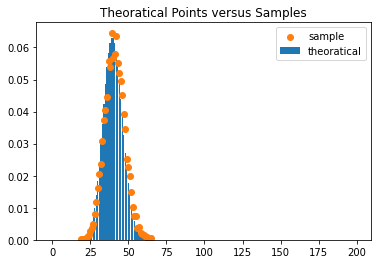

In [16]:
plt.bar(
    np.arange(upper_bound), 
    [getPoiPMF(lam, i) for i in range(upper_bound)], 
    label='theoratical',
)
plt.scatter(unique, counts/sum(counts), label='sample', zorder=2)
plt.legend()
plt.title('Theoratical Points versus Samples')

##Q3. [8 points]

* Rewrite your algorithm in Q2 to generate 10000 samples in a parallel way. Use the same $r$, $p$, and $\lambda$ value you used in Q2.   [No loops allowed]

* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

In [17]:
def rejection_sampling_paralle(numSamples, lam, n, p, ub, c):
  if isinstance(numSamples, (float, np.float64)):
    numSamples = int(numSamples)

  proposal = np.random.randint(ub, size=numSamples)
  acceptRate = getPoiPMF(lam, proposal) / getNBPMF(n, p, proposal) / c
  u = np.random.rand(numSamples)

  mask = u < acceptRate
  return proposal[mask]

In [18]:
'''
according to theory, if we need 10000 samples, 
we need at least generate ceiling(10000*c) + 4*sqrt(10000(c**2-c)) samples
'''
import math 
upper_bound = 80

print('we need to generate %s samples' % N)
numberOfSamples = N*c + 4*math.sqrt(10000*(c**2-c))
samples = rejection_sampling_paralle(numberOfSamples, lam, r, p, upper_bound, c)
print('we get %s valid samples at the end' % len(samples))
unique, counts = np.unique(samples, return_counts=True)

we need to generate 10000 samples
we get 10203 valid samples at the end


Text(0.5, 1.0, 'Theoratical Points versus Samples')

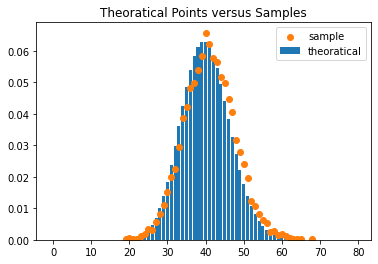

In [19]:
plt.bar(
    np.arange(upper_bound), 
    [getPoiPMF(lam, i) for i in range(upper_bound)], 
    label='theoratical',
)
plt.scatter(unique, counts/sum(counts), label='sample', zorder=2)
plt.legend()
plt.title('Theoratical Points versus Samples')

##Q4. [7 points]

Let's evaluate the efficiency of our algorithm:

* when using $r=2$ and generating the samples one by one, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 
* When using $r=2$ and generating the samples in parallel based on the formula provided in the lecture, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? [Since the probability of having a final sample size less than 10000 is extremely small, you can assume you always get at least 10000 samples]
* If we change the value of $r$ to 3 and use the same method to get $p$, how does the value of $c$ change? If we generate samples on by one, how many samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 
* If we change the value of $r$ to 40 and use the same method to get $p$, how does the value of $c$ change? If we generate samples on by one, how many  samples from a geometric distribution do we need on average to generate 10000 samples from our target distribution? 


In [20]:
print("on average, if we generate samples one by one, we need %s samples from geometric distribution,\n to generate 10000 valid samples" % np.ceil(N*c*r))

on average, if we generate samples one by one, we need 95331.0 samples from geometric distribution,
 to generate 10000 valid samples


In [21]:
print("on average, if we generate samples in parallel, we need %s samples from geometric distribution,\n to generate 10000 valid samples" % (numberOfSamples*r))

on average, if we generate samples in parallel, we need 98720.23018761963 samples from geometric distribution,
 to generate 10000 valid samples


In [22]:
x = np.arange(100)
lam = 40
r = 3

r_s = sympy.Symbol("r")
p_s = sympy.Symbol("p", nonnegative=True)
lm_s = sympy.Symbol("λ")

p = sympy.solve((((r_s*p_s) / (1-p_s)) - lm_s).subs({r_s: r, lm_s: lam}))[0]

pmf_poi_3 = [lam**(i) * np.exp(-1*lam) / spsp.factorial(i) for i in range(100)]
pmf_ng_bin_3 = spsp.comb(x+r-1, x) * (1-p)**(r) * p**(x)
c = np.max(pmf_poi_3/pmf_ng_bin_3)
print('if we change r to 3, c will become: %s' % c)
print("on average, if we generate samples one by one, we need %s samples,\n to generate 10000 valid samples" % np.ceil(N*c))

if we change r to 3, c will become: 3.88465388450652
on average, if we generate samples one by one, we need 38847 samples,
 to generate 10000 valid samples


In [23]:
x = np.arange(100)
lam = 40
r = 40

r_s = sympy.Symbol("r")
p_s = sympy.Symbol("p", nonnegative=True)
lm_s = sympy.Symbol("λ")

p = sympy.solve((((r_s*p_s) / (1-p_s)) - lm_s).subs({r_s: r, lm_s: lam}))[0]

pmf_poi_40 = [lam**(i) * np.exp(-1*lam) / spsp.factorial(i) for i in range(100)]
pmf_ng_bin_40 = spsp.comb(x+r-1, x) * (1-p)**(r) * p**(x)
c = np.max(pmf_poi_40/pmf_ng_bin_40)
print('if we change r to 40, c will become: %s' % c)
print("on average, if we generate samples one by one, we need %s samples,\n to generate 10000 valid samples" % np.ceil(N*c))

if we change r to 40, c will become: 1.41568741527346
on average, if we generate samples one by one, we need 14157 samples,
 to generate 10000 valid samples


##Q5. [15 points]

Let's work on an extension of the Pokemon Go example we saw in HW1. Let's assume that a random player can only belong to one of the three following segments:

* Segment 1: Players will keep on playing until they see 1 shiny pokemon
* Segment 2: Players will keep on playing until they see 2 shiny pokemon
* Segment 3: Players will only check up to 30 pokemon. However, if they get one shiny pokemon during the process, they will stop.


Let's assume that a player has a 0.25 probability of belonging to segment 1 and a 0.1 probability of belonging to segment 2. 

Again, let's assume the probability of encountering a shiny pokemon is 0.1. 

We are interested in getting 10000 samples of $x$, where $x$ is a variable that represents the number of non-shiny pokemon encountered before a random player stops.

* Construct a function that will generate one sample of $x$ based on the composition method.
* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

In [24]:
def mixture():
  u = np.random.rand()
  if u < 0.25:
    x = np.random.geometric(p=0.1, size=1)[0] - 1
  elif u < 0.35:
    x = np.random.negative_binomial(n=2, p=0.1, size=1)[0]
  else:
    x = min(30, np.random.geometric(p=0.1, size=1)[0] - 1)
  return x

In [25]:
N = 10000
samples = [mixture() for _ in range(N)]
unique, counts = np.unique(samples, return_counts=True)

In [26]:
seg3_PMF = spst.geom.pmf(np.arange(30), p=0.1)
seg3_PMF = np.append(seg3_PMF[1:], 1-sum(seg3_PMF[1:]))
seg3_PMF, len(seg3_PMF)

(array([0.1       , 0.09      , 0.081     , 0.0729    , 0.06561   ,
        0.059049  , 0.0531441 , 0.04782969, 0.04304672, 0.03874205,
        0.03486784, 0.03138106, 0.02824295, 0.02541866, 0.02287679,
        0.02058911, 0.0185302 , 0.01667718, 0.01500946, 0.01350852,
        0.01215767, 0.0109419 , 0.00984771, 0.00886294, 0.00797664,
        0.00717898, 0.00646108, 0.00581497, 0.00523348, 0.04710129]), 30)

In [27]:
x = np.arange(max(unique))
if len(seg3_PMF) != len(x):
  seg3_PMF = np.append(seg3_PMF, np.zeros(len(x)-len(seg3_PMF)))
pmf = 0.25 * spst.geom.pmf(x, p=0.1, loc=1) \
      + 0.1 * spst.nbinom.pmf(x, n=2, p=0.1) \
      + 0.65 * seg3_PMF

Text(0.5, 1.0, 'Theoratical Points versus Samples')

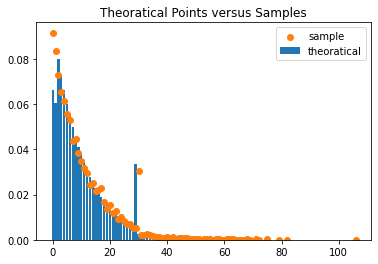

In [28]:
plt.bar(x, pmf, label='theoratical')
plt.scatter(unique, counts/sum(counts), zorder=2, label='sample')
plt.legend()
plt.title('Theoratical Points versus Samples')

##Q6. [10 points]

* Rewrite your algorithm in Q5 to generate 10000 samples in a parallel way. [No loops allowed]

* Visualize the sample distribution (using a scatter plot) and the corresponding theoretical distribution (using a bar chart) in the same graph.

In [29]:
def mixture(N):
  u = np.random.rand(N)
  seg1 = np.random.geometric(p=0.1, size=N) - 1
  seg2 = np.random.negative_binomial(n=2, p=0.1, size=N)
  seg3 = np.random.geometric(p=0.1, size=N) - 1
  seg3 = np.array([i if i < 30 else 30 for i in seg3])
  x = np.concatenate((seg1[u < 0.25], seg2[(u < 0.35) & (u >= 0.25)], seg3[u >= 0.35]))
  return x

In [30]:
samples = mixture(N)
unique, counts = np.unique(samples, return_counts=True)

Text(0.5, 1.0, 'Theoratical Points versus Samples')

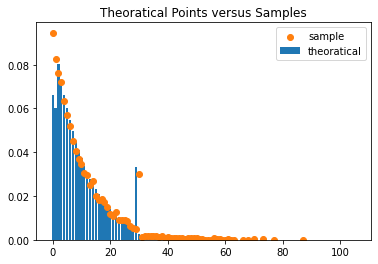

In [31]:
plt.bar(x, pmf, label='theoratical')
plt.scatter(unique, counts/sum(counts), zorder=2, label='sample')
plt.legend()
plt.title('Theoratical Points versus Samples')

#Exercise 2 [10 points]



##Q1. [3 points]

* Use np.random.rand() to generate 10000 samples and  visualize the distribution of the samples.
* In the same plot, plot the corresponding target theoretical distribution.


Text(0.5, 1.0, 'Theoratical Points versus Samples')

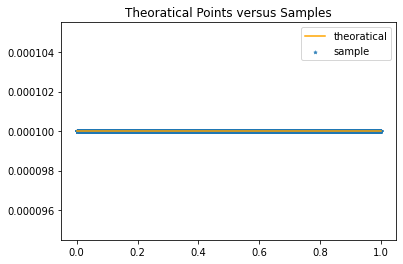

In [32]:
N = 10000
samples = np.random.rand(N)
unique, counts = np.unique(samples, return_counts=True)
pmf_uni = 1/N

plt.plot(
    [0, 1], [1/N, 1/N], 
    label='theoratical',
    color='orange'
)
plt.scatter(
    unique, counts/sum(counts), 
    label='sample', zorder=2,
    alpha=0.7, marker='*', s=10
)
plt.legend()
plt.title('Theoratical Points versus Samples')

## Q2. [7 points]

* Based on the 10000 samples, we can get a sample mean. Repeat the process 1000 times to get 1000 sample means.
* Plot the sample distribution of these 1000 sample means.
* Based on the central limit theorem, plot the theoretical distribution of the sample mean in the same plot.

In [33]:
sample_mean = [np.mean(np.random.rand(N)) for _ in range(1000)]

Text(0.5, 1.0, 'Theoratical Points versus Samples')

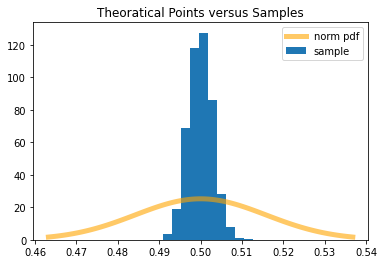

In [34]:
rv = spst.norm(loc=1/2, scale=math.sqrt(1/4000))
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

plt.plot(
    x, rv.pdf(x),
    'r-', lw=5, alpha=0.6, label='norm pdf',
    color='orange'
)

plt.hist(
    sample_mean, density=True,
    label='sample', zorder=2
)
plt.legend()
plt.title('Theoratical Points versus Samples')